# Exploitation vs Exploration

In [4]:
%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    print(module_path)
    sys.path.append(module_path)
import numpy as np
import matplotlib.pyplot as plt

from bayes_opt import BayesianOptimization

/Users/uknowit/DSML/BayesianOptimization


# Target function

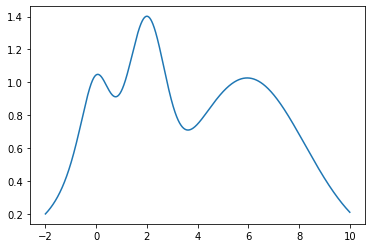

In [5]:
np.random.seed(42)
xs = np.linspace(-2, 10, 10000)

def f(x):
    return np.exp(-(x - 2) ** 2) + np.exp(-(x - 6) ** 2 / 10) + 1/ (x ** 2 + 1)

plt.plot(xs, f(xs))
plt.show()

## Utility function for plotting

In [6]:
def plot_bo(f, bo):
    x = np.linspace(-2, 10, 10000)
    mean, sigma = bo._gp.predict(x.reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    plt.plot(x, f(x))
    plt.plot(x, mean)
    plt.fill_between(x, mean + sigma, mean - sigma, alpha=0.1)
    plt.scatter(bo.space.params.flatten(), bo.space.target, c="red", s=50, zorder=10)
    plt.show()

# Acquisition Function "Upper Confidence Bound"

## Prefer exploitation (kappa=1.0)

Note that most points are around the peak(s).

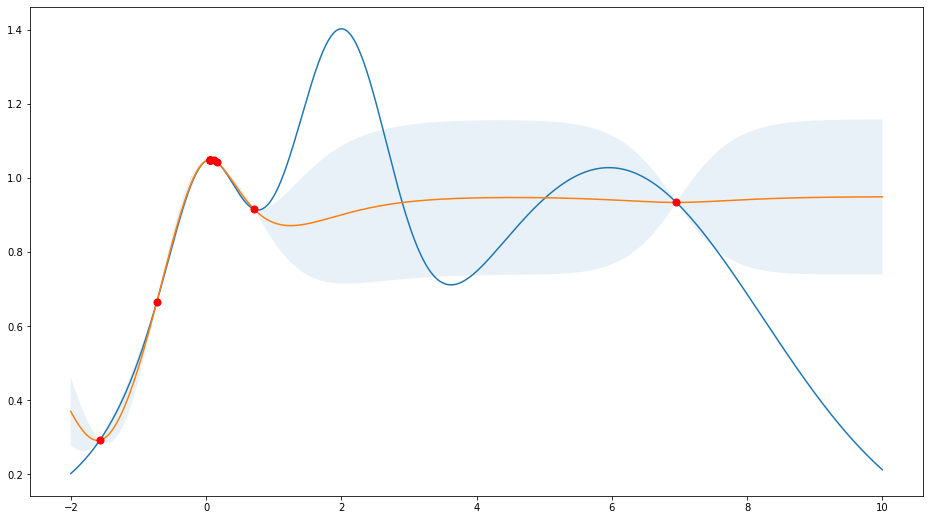

In [7]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ucb", kappa=0.1)

plot_bo(f, bo)

## Prefer exploration (kappa=10)

Note that the points are more spread out across the whole range.

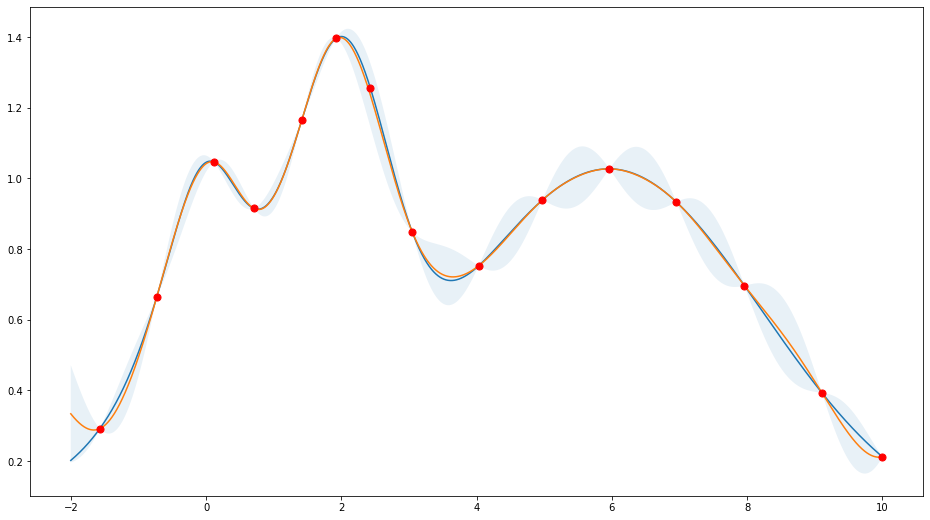

In [8]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ucb", kappa=10)

plot_bo(f, bo)

# Acquisition Function "Expected Improvement"

## Prefer exploitation (xi=0.0)

Note that most points are around the peak(s).

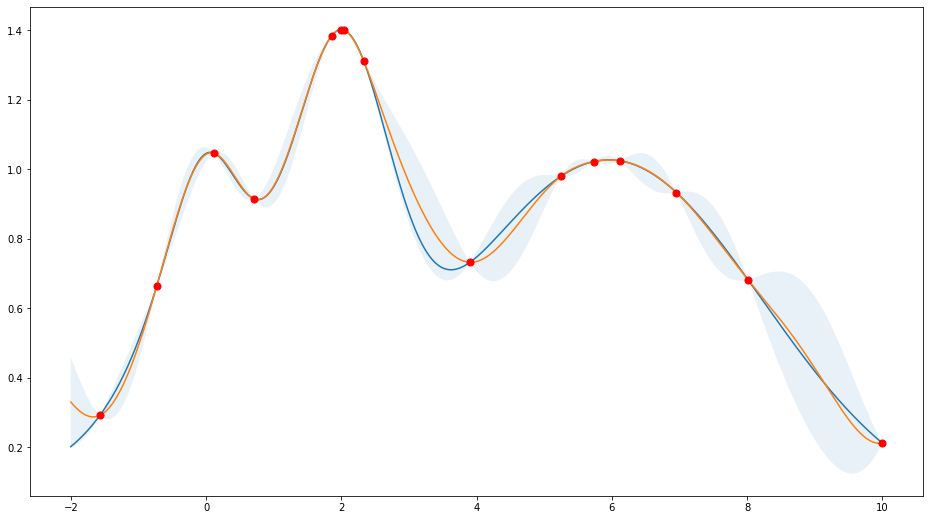

In [9]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ei", xi=1e-4)

plot_bo(f, bo)

## Prefer exploration (xi=0.1)

Note that the points are more spread out across the whole range.

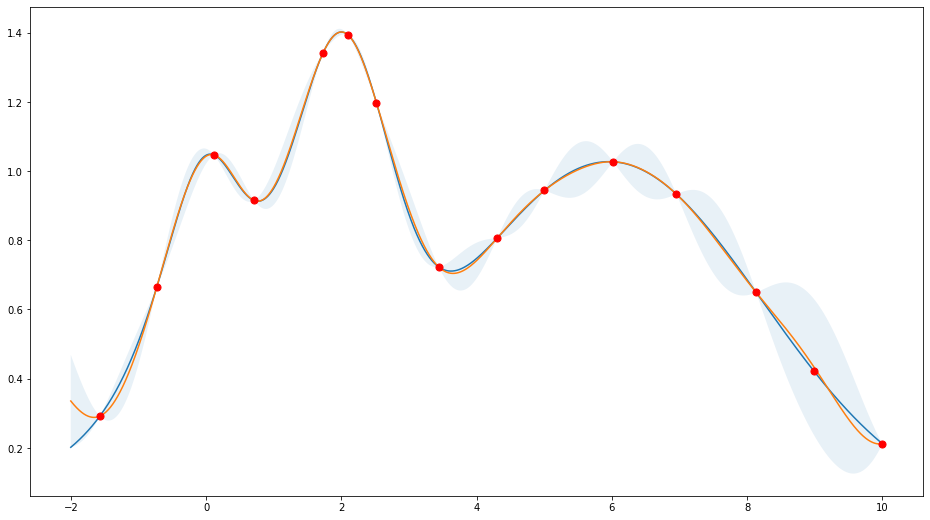

In [10]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ei", xi=1e-1)

plot_bo(f, bo)

# Acquisition Function "Probability of Improvement"

## Prefer exploitation (xi=0.0)

Note that most points are around the peak(s).

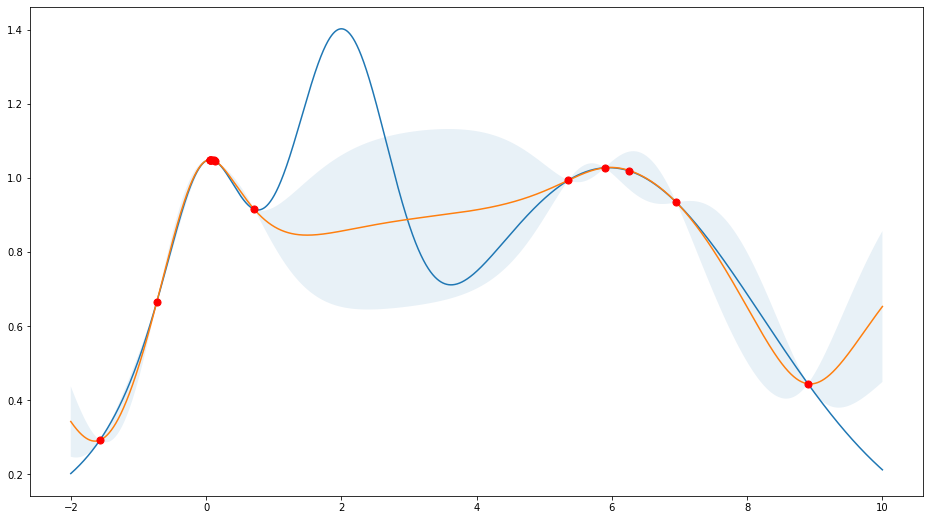

In [11]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="poi", xi=1e-4)

plot_bo(f, bo)

## Prefer exploration (xi=0.1)

Note that the points are more spread out across the whole range.

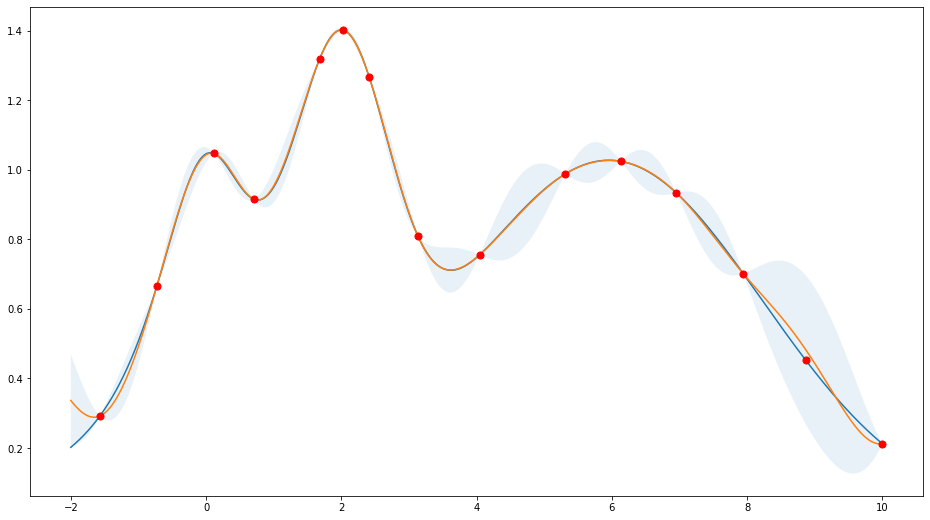

In [12]:
bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="poi", xi=1e-1)

plot_bo(f, bo)